##### 합성 삼각함수를 만들고 고속 푸리에 변환으로 분해하기


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random as r

In [8]:
def sin_wave(amp, freq, time):
    SinNum = amp * np.sin(2*np.pi*freq*time)
    return SinNum

def cos_wave(amp, freq, time):
    CosNum = amp * np.cos(2*np.pi*freq*time)
    return CosNum

CountSin = r.randint(2, 9)
CountCos = r.randint(2, 9)

time = np.linspace(0, 1, 1000)  # 시간 범위를 0부터 1까지 1000등분한 배열 생성 - 실제와 가까운 개형(매끄러운 개형)을 얻기 위해서 설정함

ListSin = []  # 사인 함수들의 결과를 저장할 리스트
ListCos = []  # 코사인 함수들의 결과를 저장할 리스트

# 임의의 사인 함수 생성
for s in range(CountSin):
    amp = r.randint(1, 9)
    freq = r.randint(1, 9)
    sin_num = sin_wave(amp, freq, time)
    ListSin.append(sin_num)

comp_sin = np.sum(ListSin, axis=0)  # 합성 삼각함수 생성

# 임의의 코사인 함수 생성
for c in range(CountCos):
    amp = r.randint(1, 9)
    freq = r.randint(1, 9)
    cos_num = cos_wave(amp, freq, time)
    ListCos.append(cos_num)

comp_cos = np.sum(ListCos, axis=0)  # 합성 코사인함수 생성

In [11]:
comp_func = comp_cos + comp_sin # 합성 사인함수와 함성 코사인함수을 합성

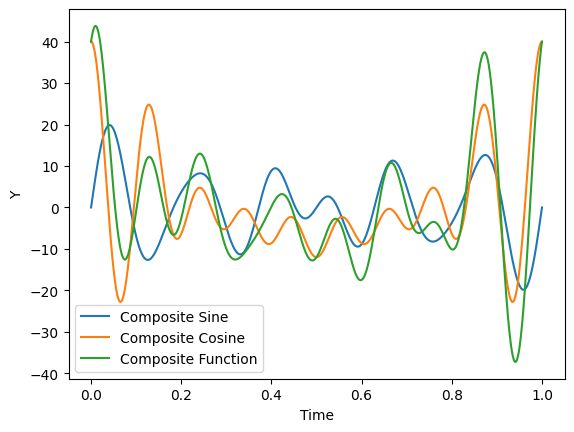

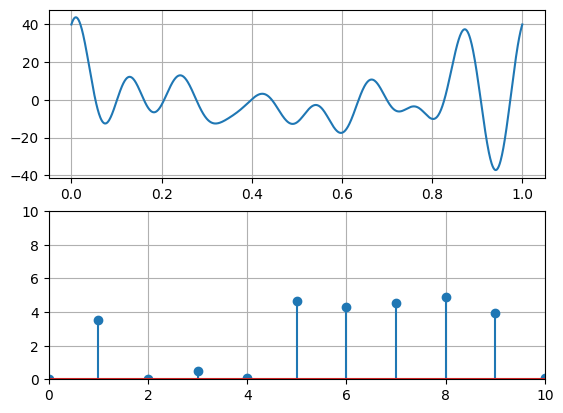

In [14]:
# 합성 삼각함수 시각화
plt.plot(time, comp_sin, label='Composite Sine')
plt.plot(time, comp_cos, label='Composite Cosine')
plt.plot(time, comp_func, label='Composite Function')

plt.xlabel('Time')
plt.ylabel('Y')
plt.legend()
plt.show()

fft = np.fft.fft(comp_func) / len(comp_func) # FFT 과정 사용
fft_magnitude = abs(fft) 

plt.subplot(2,1,1) # FFT 결과를 그래프 상에서 나타냄
plt.plot(time,comp_func)
plt.grid()
 
plt.subplot(2,1,2)
plt.stem(fft_magnitude)
plt.ylim(0,2.5)
plt.grid()
plt.axis([0, 10, 0, 10])
plt.show()